# BL40A2030 Wireless Communication Networks

## Week 1 - Assignment

### Author: Teemu Haahti

### Part I: Theory (40%)

**1. Explain with your own words (1 or 2 paragraphs) the three-layer model presented in the lecture and in [[2]](https://www.ece.rutgers.edu/~marsic/books/CN/book-CN_marsic.pdf).**

Answer:

Three-layer model is a reference architecture that divides networking protocols to three connected parts: 
1. Link layer <br>
2. Network layer <br>
3. End-to-end layer. <br>

The link layer is the layer that implements the physical transmission between nodes. In wireless networks this means specifying and using a set protocol between links for example IEEE 802.11 (Wi-Fi). The network layer contains the network and gives endpoints "addresses" and tells how to get between them. End-to-end layer contains the user interface which are the applications used (video games, Teams). <br>

**2. Retransmissions via ARQ are important to the system reliability (lower packet error probability) but it has some drawbacks. However, it has some effects in the delay and traffic congestion. Describe with your own words one of the existing trade-offs.** (Hint: If restransmissions are allowed, the packet will stay in *walking* in the network more time).

Answer:

Using ARQ has the advantage of lower packet error probability. However when a packet is allowed to be retransmitted a specified amount of times it will eat up the data transmission rate in the channel and increases latency. This efficiency problem is most severe in stop-and-wait type ARQ and happens less in go-back-N ARQ and least selective-repeat ARQ. The complexity of the systems needed increases when going from stop-and-wait to go-back-N and in selective-repeat ARQ the complexity is highest. 

### Part II: Jupyter NB experiments (60%)

In [1]:
!pip install numpy
!pip install matplotlib

     |████████████████████████████████| 15.7 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.2 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 46.0 MB/s eta 0:00:01


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**3. Analyze a queue system similar to the tutorial considering $\lambda = 3$ and $\mu = 4$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

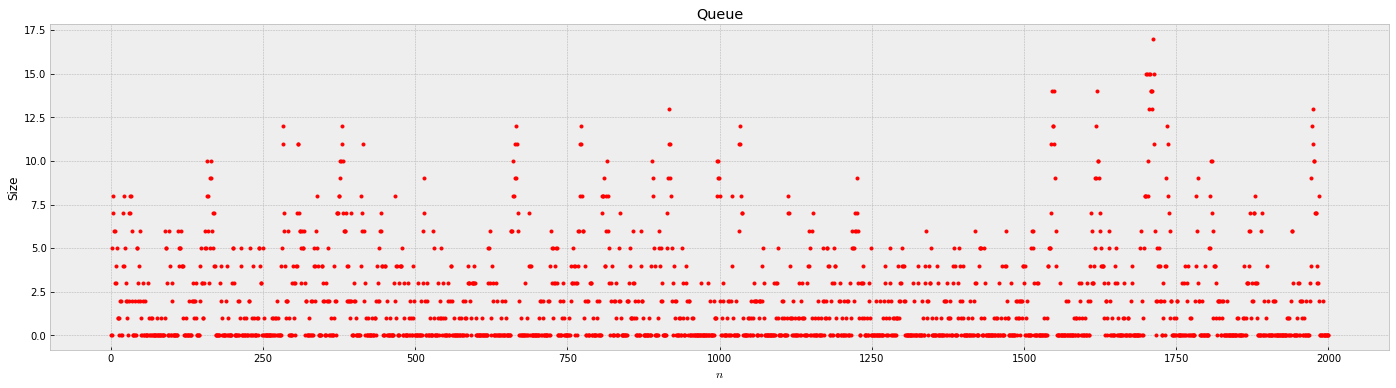

Worst delay: 17.0
Number of times idle: 986


In [3]:
# Mean of arrivals, lambda = 3
mean_a=3
# Mean of service rate of arrivals, Mu = 4
mean_s=4

#time periods
size=2000

#Arrival
arrival = np.random.poisson(mean_a, size)
#Service
service = np.random.poisson(mean_s, size)

# Calculations and plotting
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
        
# Count the number of times queue is 0
idle = np.count_nonzero(queue==0) - 1       
        
plt.figure(figsize=(24,6))
plt.plot(queue, 'or', markersize=3)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Worst delay:', np.max(queue))
print('Number of times idle:', idle)

Works pretty well in case of not long queues but has a really big amount of idling.

**4. Analyze a queue system similar to the tutorial considering $\lambda = 4$ and $\mu = 3$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

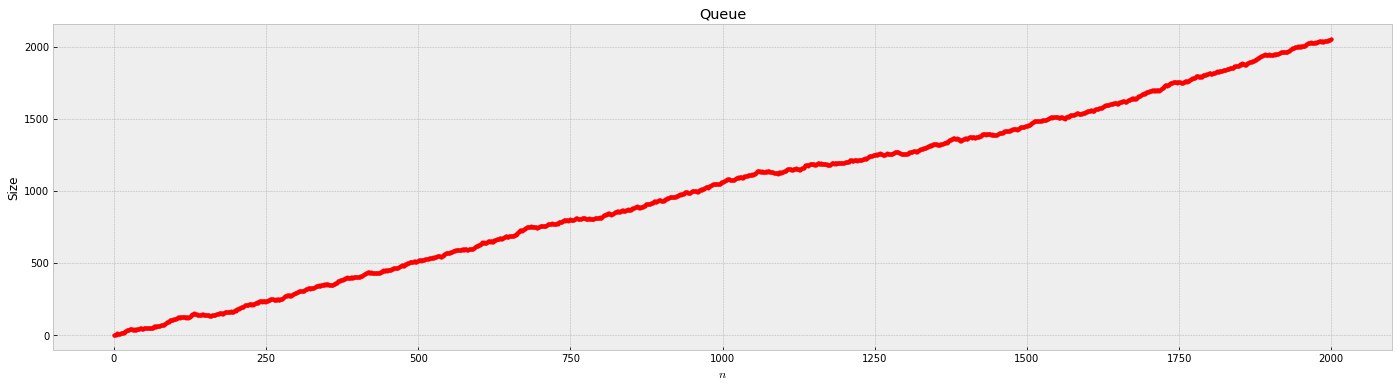

Worst delay: 2056.0
Number of times idle: 0


In [4]:
# Mean of arrivals, lambda = 4
mean_a=4
# Mean of service rate of arrivals, Mu = 3
mean_s=3

#time periods
size=2000

#Arrival
arrival = np.random.poisson(mean_a, size)
#Service
service = np.random.poisson(mean_s, size)

# Calculations and plotting
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])

# Count the number of times queue is 0
idle = np.count_nonzero(queue==0) - 1    
        
plt.figure(figsize=(24,6))
plt.plot(queue, 'or', markersize=3)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Worst delay:', np.max(queue))
print('Number of times idle:', idle)

This network can never handle the amount of queue coming in.

**5. Analyze a queue system similar to the tutorial considering $\lambda = 3$ and $\mu = 3$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

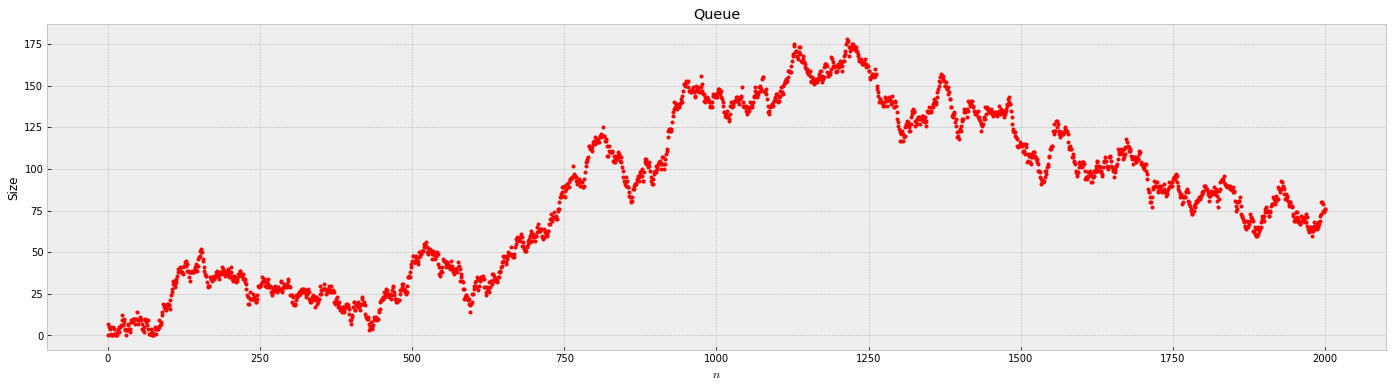

Worst delay: 178.0
Number of times idle: 10


In [5]:
# Mean of arrivals, lambda = 3
mean_a=3
# Mean of service rate of arrivals, Mu = 3
mean_s=3

#time periods
size=2000

#Arrival
arrival = np.random.poisson(mean_a, size)
#Service
service = np.random.poisson(mean_s, size)

# Calculations and plotting
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])

# Count the number of times queue is 0
idle = np.count_nonzero(queue==0) - 1    
        
plt.figure(figsize=(24,6))
plt.plot(queue, 'or', markersize=3)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Worst delay:', np.max(queue))
print('Number of times idle:', idle)

This system works out pretty randomly because of the distribution is random even though it is around the same mean. Seems to turn out with pretty long queues though.